In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split as tt

In [3]:
df=pd.read_csv("Ayush Agarwal.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [6]:
#price range has null vaules so will fill them first

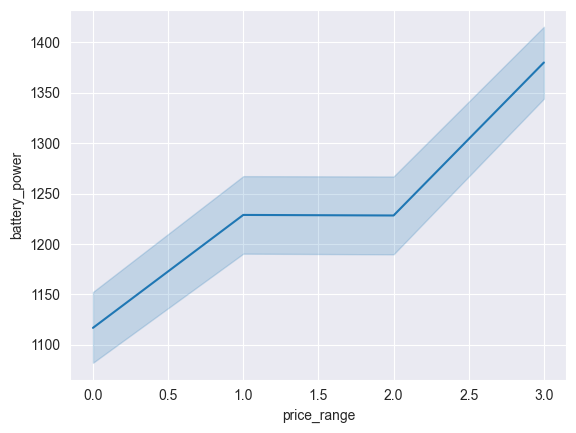

In [7]:
sns.lineplot(x="price_range",y="battery_power",data=df)
plt.show()

In [8]:
a=df.loc[df["price_range"]==0,"battery_power"].mean()

In [9]:
b=df.loc[df["price_range"]==1,"battery_power"].mean()

In [10]:
c=df.loc[df["price_range"]==2,"battery_power"].mean()

In [11]:
d=df.loc[df["price_range"]==3,"battery_power"].mean()

In [12]:
k=(a+b)/2

In [13]:
l=(c+b)/2

In [14]:
m=(c+d)/2

In [15]:
print(k,l,m)

1172.885 1228.594 1304.152


In [16]:
df.loc[df['battery_power']<=k,'price_range']=df.loc[df['battery_power']<=k,'price_range'].fillna(0)

In [17]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,NaN
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,0.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,NaN
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,NaN


In [18]:
df.loc[df['battery_power']>=m,'price_range']=df.loc[df['battery_power']>=m,'price_range'].fillna(3)

In [19]:
df.loc[(df['battery_power']>k)&(df['battery_power']<l),'price_range']=df.loc[(df['battery_power']>k)&(df['battery_power']<l),'price_range'].fillna(1)

In [20]:
df.loc[(df['battery_power']>=l)&(df['battery_power']<m),'price_range']=df.loc[(df['battery_power']>=l)&(df['battery_power']<m),'price_range'].fillna(2)

In [21]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,3.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,0.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,1.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,3.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [23]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1241.849000,0.502000,1.528467,0.512000,4.404000,0.510000,32.581667,0.507000,140.003000,4.456333,...,639.112333,1247.601667,2129.141333,12.202667,5.616667,11.035667,0.759667,0.502000,0.507000,1.505333
std,437.063804,0.500079,0.820358,0.499939,4.383742,0.499983,18.152810,0.285969,35.213809,2.289361,...,440.202998,434.666168,1085.694231,4.251151,4.322494,5.474400,0.427357,0.500079,0.500034,1.231724
min,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,863.750000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,2.000000,...,277.750000,865.000000,1212.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1232.000000,1.000000,1.500000,1.000000,3.000000,1.000000,33.000000,0.500000,140.000000,4.000000,...,564.000000,1248.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1619.000000,1.000000,2.300000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,6.000000,...,932.500000,1634.000000,3065.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [24]:
df.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,3.0
2996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,0.0
2997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,1.0
2998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,3.0


In [25]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [26]:
for i in df.columns:
    print(i)
    print(df[i].unique())

battery_power
[ 842 1021  563 ...  971  905 1797]
blue
[0 1]
clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
dual_sim
[0 1]
fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
four_g
[0 1]
int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  89  82 130 189 181  99 184 195 108 133 179 147 137 190 176  84  97 124
 183 113  92  95 151 117  94 173 105 115  91 112 123 129 154 191 175  86
  98 125 126 158 170 161 19

In [27]:
c=df.corr()

<Axes: >

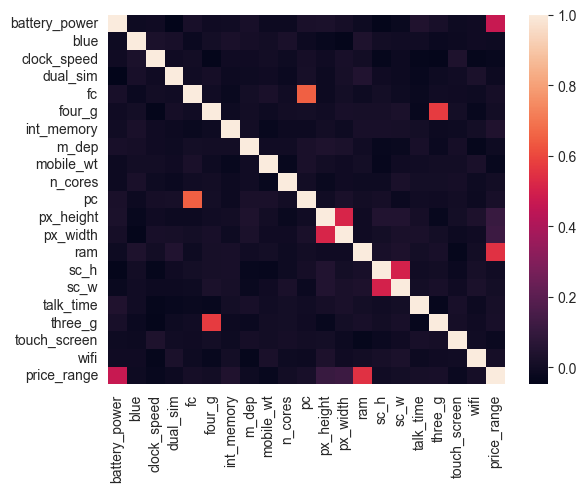

In [54]:
sns.heatmap(c)

#it is clear that price_range has a relation with battery power and ram and int_memoryand slightly on px_height and px_width and negatively with touch screen

<Axes: xlabel='price_range', ylabel='ram'>

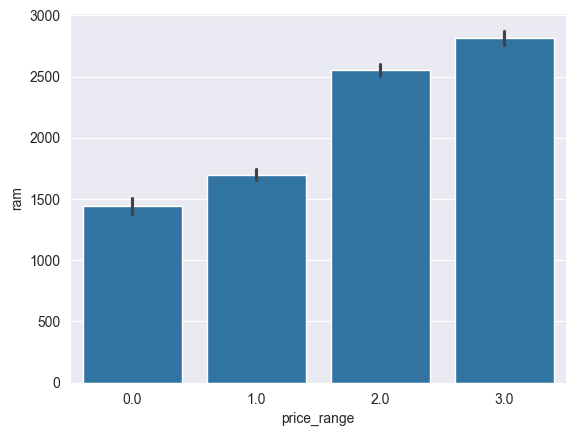

In [56]:
sns.barplot(y="ram",x="price_range",data=df)

<Axes: xlabel='price_range', ylabel='battery_power'>

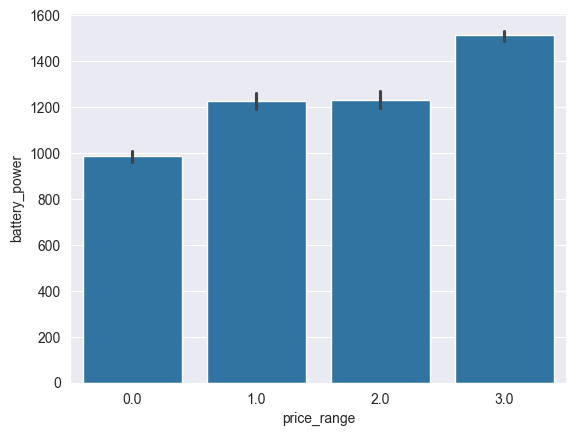

In [57]:
sns.barplot(y="battery_power",x="price_range",data=df)

<Axes: xlabel='price_range', ylabel='px_height'>

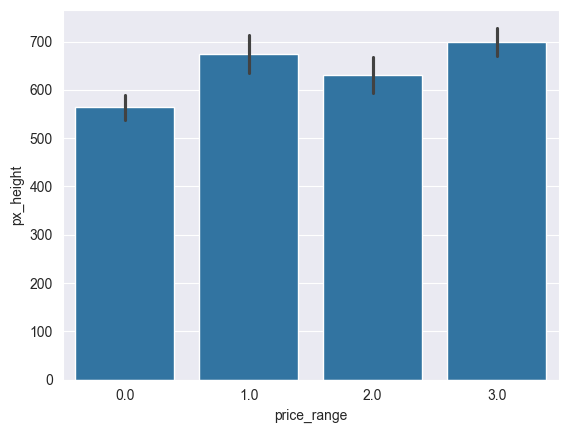

In [58]:
sns.barplot(y="px_height",x="price_range",data=df)

<Axes: xlabel='price_range', ylabel='px_width'>

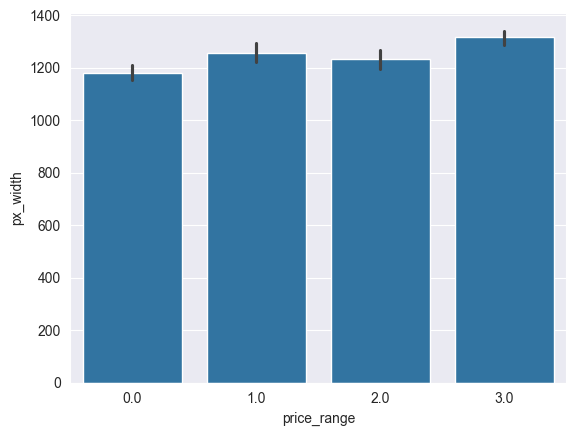

In [59]:
sns.barplot(y="px_width",x="price_range",data=df)

<Axes: xlabel='price_range', ylabel='touch_screen'>

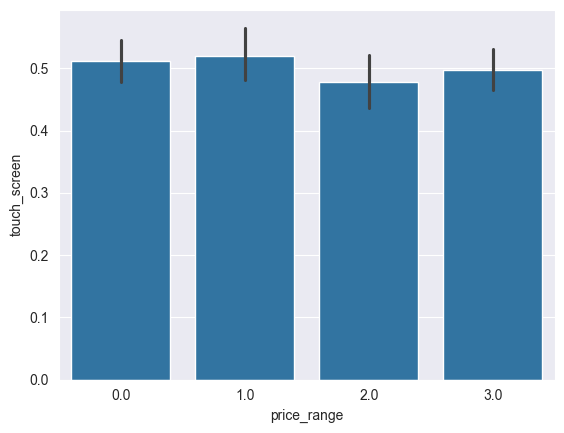

In [60]:
sns.barplot(y="touch_screen",x="price_range",data=df)

<Axes: xlabel='price_range', ylabel='int_memory'>

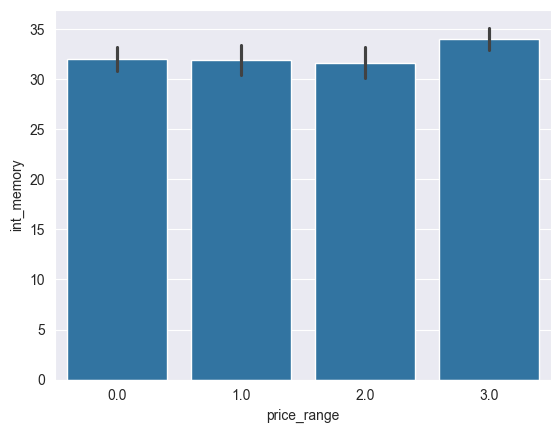

In [61]:
sns.barplot(y="int_memory",x="price_range",data=df)

<Axes: xlabel='price_range', ylabel='n_cores'>

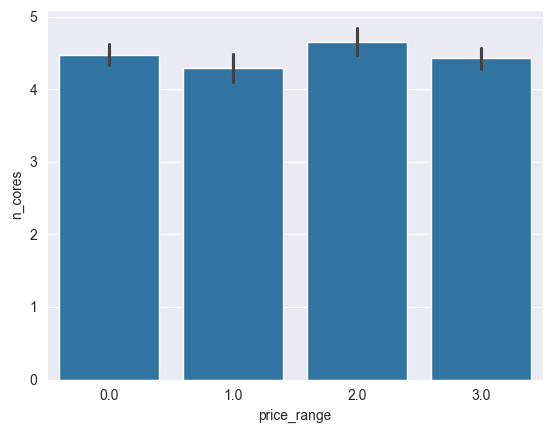

In [63]:
sns.barplot(y="n_cores",x="price_range",data=df)

In [68]:
y=df['price_range']
x=df.drop(["dual_sim","blue",'clock_speed','fc','four_g','m_dep','mobile_wt','sc_h','sc_w','three_g','wifi','price_range'],axis=1)

In [69]:
x

,battery_power,int_memory,n_cores,pc,px_height,px_width,ram,talk_time,touch_screen
0,842,7,2,2,20,756,2549,19,0
1,1021,53,3,6,905,1988,2631,7,1
2,563,41,5,6,1263,1716,2603,9,1
3,615,10,6,9,1216,1786,2769,11,0
4,1821,44,2,14,1208,1212,1411,15,1
...,...,...,...,...,...,...,...,...,...
2995,1700,54,7,17,644,913,2121,15,1
2996,609,13,4,2,1152,1632,1933,19,1
2997,1185,8,1,12,477,825,1223,14,0
2998,1533,50,2,12,38,832,2509,6,1


In [70]:
x_train,x_test,y_train,y_test = tt(x,y,test_size=.3)
model = LinearRegression()
algo1 = model.fit(x_train,y_train)

y_pred = algo1.predict(x_test)

In [75]:
from sklearn import metrics

r2_score=metrics.r2_score(y_test,y_pred)

In [76]:
print("R2score=",r2_score)

R2score= 0.5357029991999013


In [77]:
print("MSE=",mean_squared_error(y_test,y_pred))

MSE= 0.7007302173495071


In [78]:
print(algo1.score(x_test,y_test))

0.5357029991999013


<Axes: xlabel='price_range'>

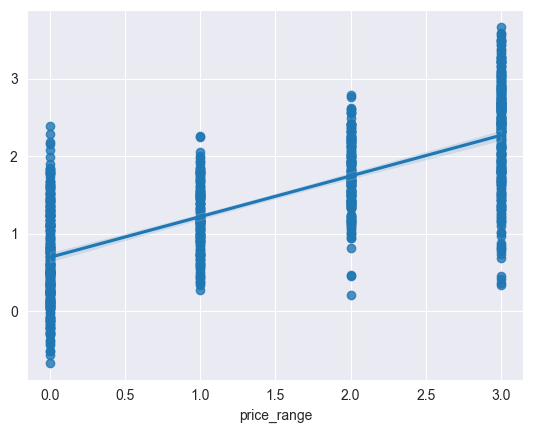

In [84]:
sns.regplot(x=y_test,y=y_pred)